In [12]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Plot styling
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Load processed data
processed_path = "../data/processed/modelling_data.csv"
df = pd.read_csv(processed_path, parse_dates=['TransactionStartTime'])

# Quick check
print("Data shape:", df.shape)
df.head()


Data shape: (95662, 17)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,is_high_risk
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,0


In [13]:
# Snapshot date for recency calculation
snapshot_date = df['TransactionStartTime'].max() + pd.Timedelta(days=1)

# Aggregate transactions per customer
rfm = df.groupby('CustomerId').agg(
    recency = ('TransactionStartTime', lambda x: (snapshot_date - x.max()).days),
    frequency = ('TransactionId', 'count'),
    monetary = ('Amount', 'sum')
).reset_index()

# Merge high-risk label
rfm = rfm.merge(df[['CustomerId','is_high_risk']].drop_duplicates(), on='CustomerId', how='left')

rfm.head()


,CustomerId,recency,frequency,monetary,is_high_risk
0,CustomerId_1,84,1,-10000.0,0
1,CustomerId_10,84,1,-10000.0,0
2,CustomerId_1001,90,5,20000.0,0
3,CustomerId_1002,26,11,4225.0,0
4,CustomerId_1003,12,6,20000.0,0


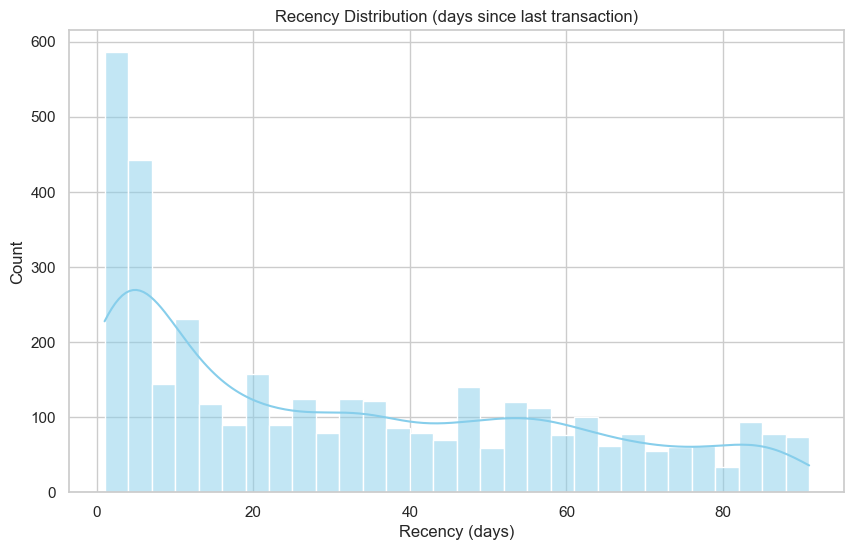

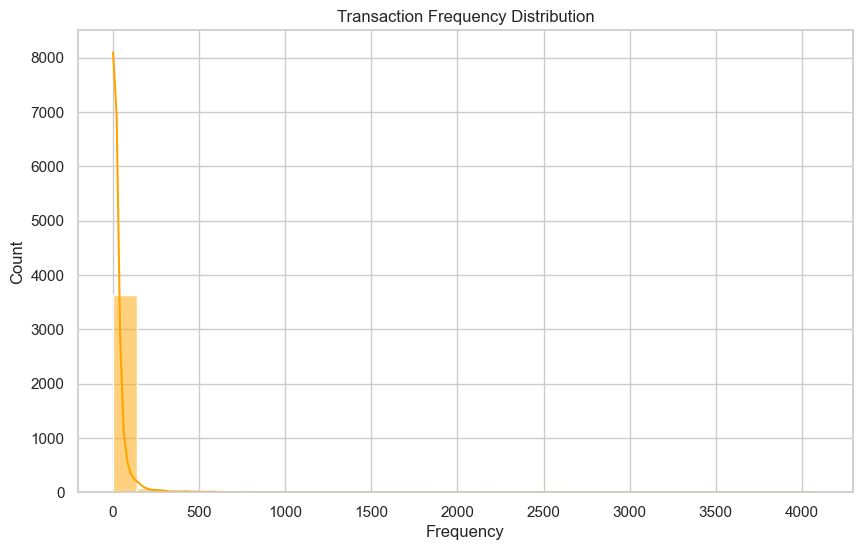

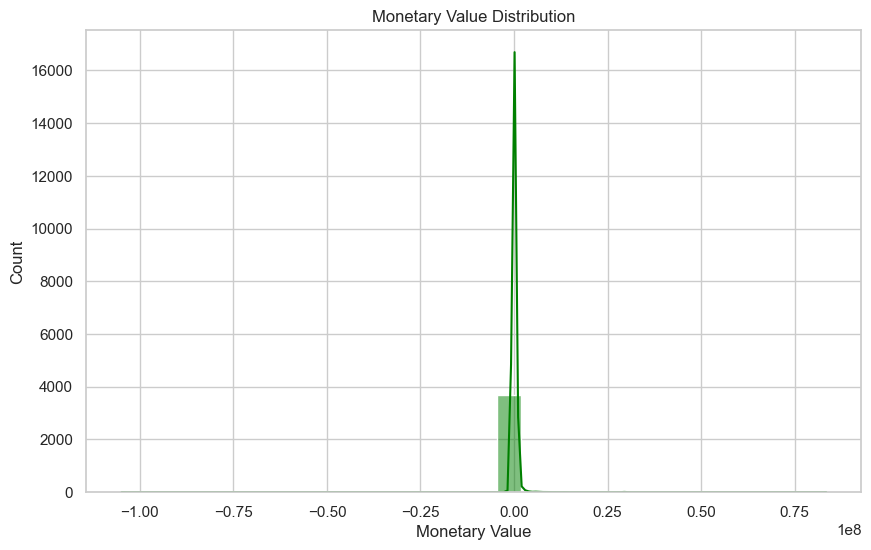

In [14]:
# Plot Recency
sns.histplot(rfm, x='recency', bins=30, kde=True, color='skyblue')
plt.title("Recency Distribution (days since last transaction)")
plt.xlabel("Recency (days)")
plt.show()

# Plot Frequency
sns.histplot(rfm, x='frequency', bins=30, kde=True, color='orange')
plt.title("Transaction Frequency Distribution")
plt.xlabel("Frequency")
plt.show()

# Plot Monetary
sns.histplot(rfm, x='monetary', bins=30, kde=True, color='green')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.show()


C:\Users\derej\AppData\Local\Temp\ipykernel_13108\723132156.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='is_high_risk', palette=['green', 'red'])


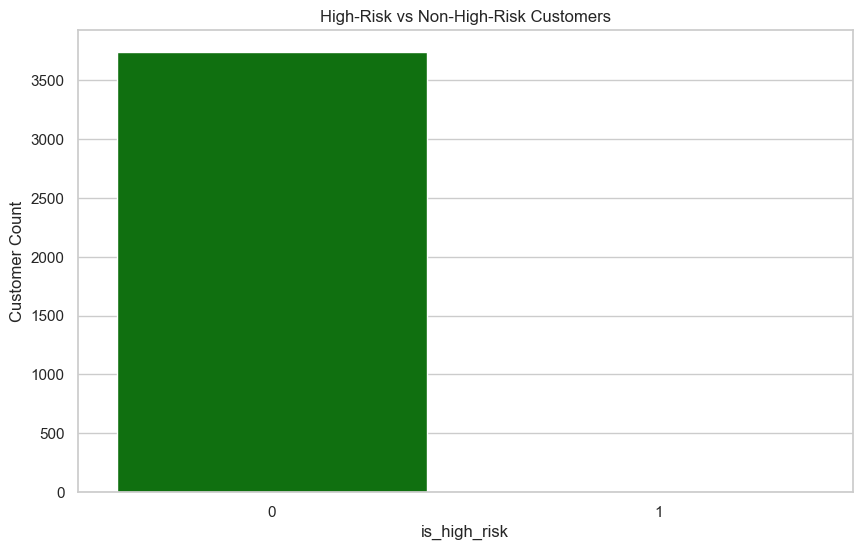

is_high_risk
0    99.973276
1     0.026724
Name: proportion, dtype: float64


In [15]:
sns.countplot(data=rfm, x='is_high_risk', palette=['green', 'red'])
plt.title("High-Risk vs Non-High-Risk Customers")
plt.xlabel("is_high_risk")
plt.ylabel("Customer Count")
plt.show()

# Optional: percentage
print(rfm['is_high_risk'].value_counts(normalize=True)*100)


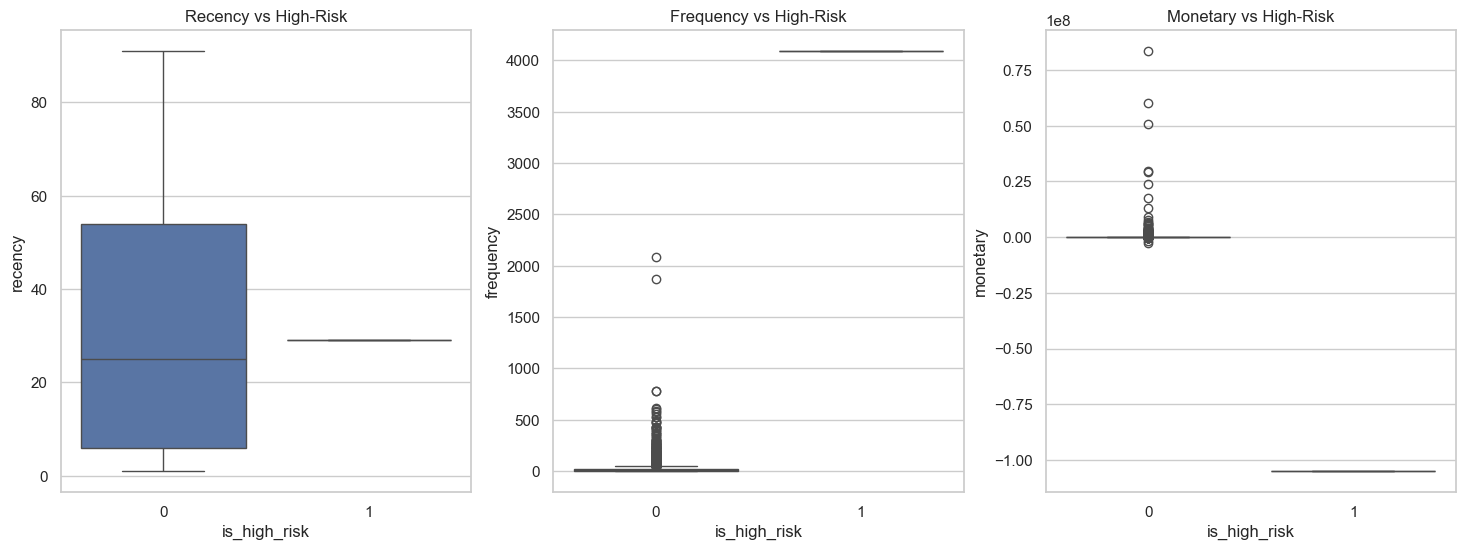

In [16]:
# Boxplots to visualize differences
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(data=rfm, x='is_high_risk', y='recency', ax=axes[0])
axes[0].set_title("Recency vs High-Risk")

sns.boxplot(data=rfm, x='is_high_risk', y='frequency', ax=axes[1])
axes[1].set_title("Frequency vs High-Risk")

sns.boxplot(data=rfm, x='is_high_risk', y='monetary', ax=axes[2])
axes[2].set_title("Monetary vs High-Risk")

plt.show()
